## Unsupervised Transformations for Data Exploration/Visualization:
    -  Principle Component Analysis (PCA)
    -  Non-negative Matrix Factorization (NMF)
    -  t-SNE manifold learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/wine quality/winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df['quality']=df['quality'].map({3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1})

In [5]:
df.shape

(1599, 12)

In [6]:
X=df.drop('quality', axis=1)
y=df['quality']

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# scaler=StandardScaler()
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [8]:
# PCA: _________________
from sklearn.decomposition import PCA 

pca=PCA(n_components=5, whiten=True, random_state=42)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

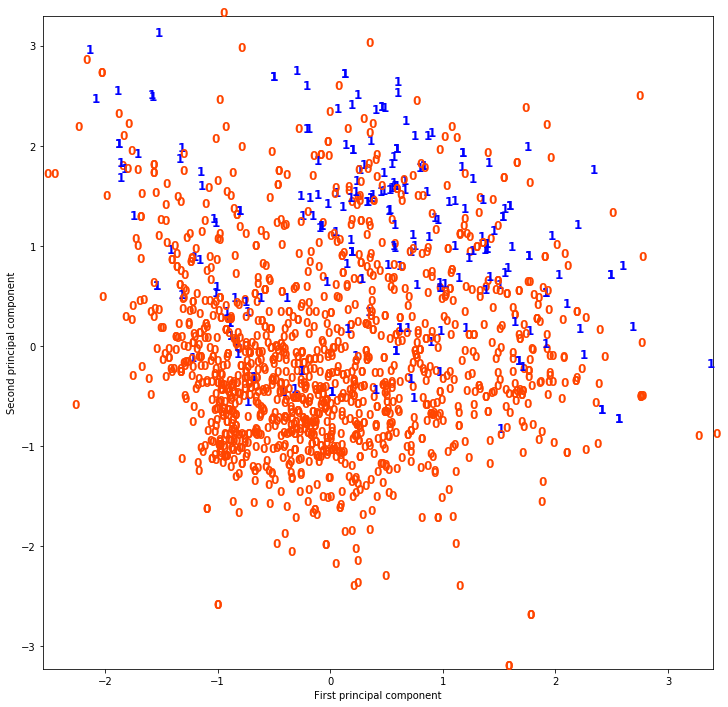

In [18]:
colors = ["orangered", "blue"] 
plt.figure(figsize=(12, 12)) 
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max()) 
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max()) 

for i in range(len(X_scaled)):    
    # actually plot the digits as text instead of using scatter    
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]), color = colors[y[i]],  
             fontdict={'weight': 'bold', 'size': 12}) 
    plt.xlabel("First principal component") 
    plt.ylabel("Second principal component") 

In [10]:
X_pca.shape

(1599, 5)

In [11]:
df_pca=pd.concat((pd.DataFrame(X_pca), y) , axis=1) 
df_pca.columns=['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'quality']

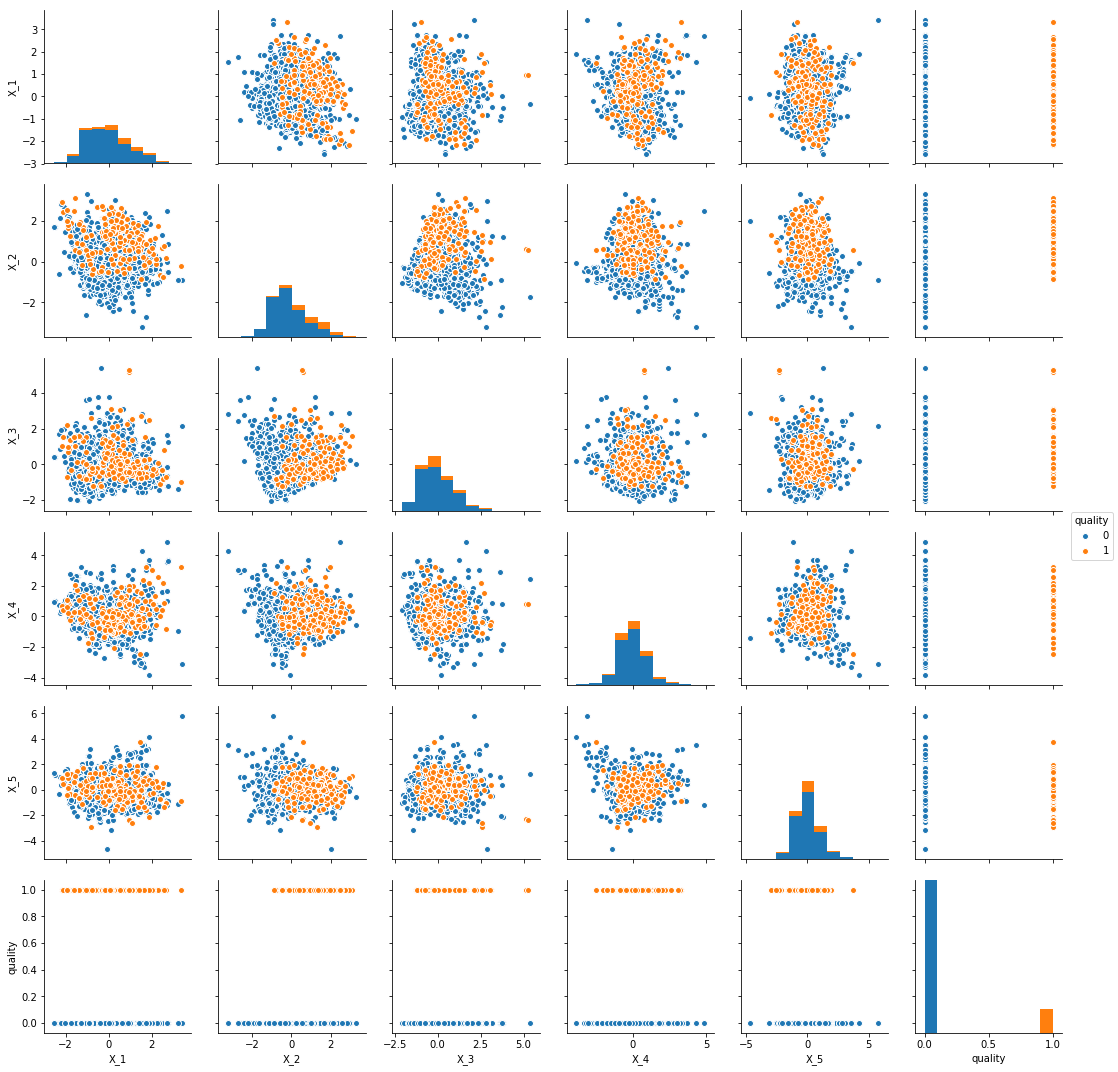

In [12]:
sns.pairplot(df_pca, hue='quality')

Text(0,0.5,'Principle components')

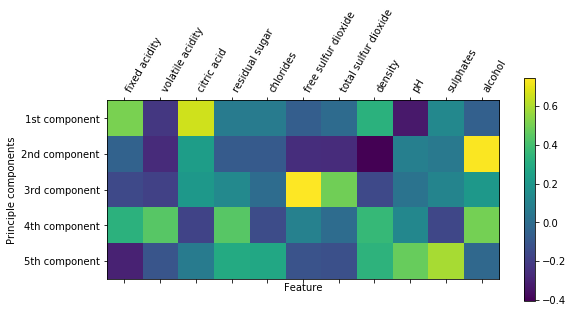

In [13]:
plt.matshow(pca.components_, cmap='viridis' )
plt.yticks([0,1,2, 3, 4], ['1st component', '2nd component', '3rd component', '4th component', '5th component'])
plt.colorbar()
plt.xticks(range(len(df.columns[:-1])), df.columns[:-1], rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principle components')

In [14]:
X_back=pca.inverse_transform(X_pca)

In [15]:
# Manifold Learning with t-SNE ____________________________________________________
from sklearn.manifold import TSNE 
tsne = TSNE(random_state=42) 

scaler=MinMaxScaler()
#scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# use fit_transform instead of fit, as TSNE has no transform method 
X_tsne = tsne.fit_transform(X_scaled)

In [16]:
X_tsne.shape

(1599, 2)

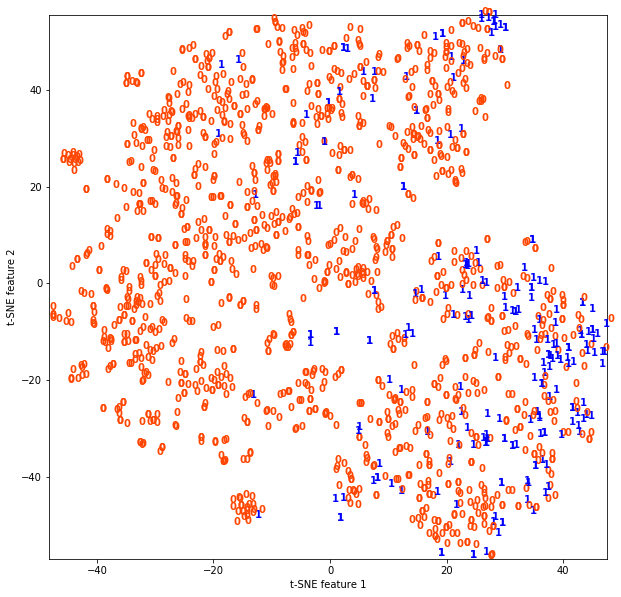

In [17]:
colors = ["orangered", "blue"] 
plt.figure(figsize=(10, 10)) 
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max()) 
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max()) 

for i in range(len(X_scaled)):    
    # actually plot the digits as text instead of using scatter    
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]), color = colors[y[i]],  fontdict={'weight': 'bold', 'size': 10}) 
    plt.xlabel("t-SNE feature 1") 
    plt.ylabel("t-SNE feature 2") 